In [12]:
from sympy import symbols, init_printing, Function, Sum, Eq, Matrix,cos, sin, pi, I, exp

#Paper T.Lubin 2010b
#Machine with no load rotor, rotor slots, current sheet on stator side

init_printing()

R_1, R_2, R_3, beta, mu_0 = symbols('R_1, R_2, R_3, beta, mu_0', real = 'true', positive = 'true', nonzero ='true')

theta_i = symbols('theta_i')
  
#Declaration of the motor geometry
Z_r = symbols('Z_r', integer = 'true', positive = 'true', nonzero ='true') #Number of rotor, stator slots

#Declaration of the space variables
r, t = symbols('r t', real = 'true', positive = 'true')
theta = symbols('theta', real ='true')

#Declaration of the discretizing integers for stator and rotor slots
i = symbols('i', integer='true', positive = 'true', nonzero='true')

#Declaration of th magnetic potentials in the 5 areas
P = Function("P")
E = Function("E")

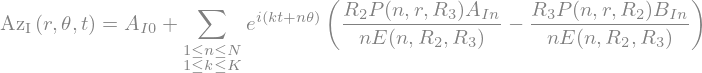

In [13]:
##AREA I : AIR GAP
#Dummy variable(s) of summation    
n, N, k, K  = symbols('n N k K', integer = 'true', positive = 'true', nonzero ='true')
#Integration constants
A_I0, A_In, B_In, C_In, D_In = symbols('A_I0, A_In, B_In, C_In, D_In', commutative=False)
#Expression of the potential
AzI_cst = A_I0
AzI_exp = A_In*R_2/n*P(n, r, R_3)/E(n, R_2, R_3) - B_In*R_3/n*P(n, r, R_2)/E(n, R_2, R_3)
expn = exp(I*(n*theta + k*t))
AzI = AzI_cst + Sum(Sum(AzI_exp*expn,(n,1,N)), (k,1,K))

#Expression of the field
#BrI_cst, BrI_cos, BrI_sin = compute_Br(AzI_cst, AzI_cos, AzI_sin, n, r, theta)
#BrI = BrI_cst + Sum(BrI_cos*cosn+BrI_sin*sinn,(n,1,N))

#BthetaI_cst, BthetaI_cos, BthetaI_sin = compute_Btheta(AzI_cst, AzI_cos, AzI_sin, r)
#BthetaI = BthetaI_cst + Sum(BthetaI_cos*cosn+BthetaI_sin*sinn,(n,1,N))

fAzI = Function('Az_I')(r,theta,t)
fBrI = Function('Br_I')(r,theta,t)
fBthetaI = Function('Btheta_I')(r,theta)


Eq(fAzI, AzI) #, Eq(fBrI, BrI), Eq(fBthetaI, BthetaI)

In [ ]:
##AREA i : ROTOR SLOT
#Dummy variable(s) of summation    
k, K  = symbols('k, K', integer = 'true', nonzero = 'true')
#Integration constants
A_i0, A_ik = symbols('A_i0, A_ik', commutative=False)
#Expression of the potential
Azi_cst = A_i0 
Azi_cos = A_ik*P(k*pi/beta, R_1, r)/P(k*pi/beta, R_1, R_2)
Azi_sin = 0
coski = cos(k*pi/beta*(theta-theta_i+beta/2))
sinki = sin(k*pi/beta*(theta-theta_i+beta/2))
Azi = Azi_cst + Sum(Azi_cos*coski,(k,1,K))

#Expression of the field
Bri_cst, Bri_cos, Bri_sin = compute_Br(Azi_cst, Azi_cos, Azi_sin, k*pi/beta, r, theta)
Bri = Bri_cst + Sum(Bri_cos*coski+Bri_sin*sinki,(k,1,K))

Bthetai_cst, Bthetai_cos, Bthetai_sin = compute_Btheta(Azi_cst, Azi_cos, Azi_sin, r)
Bthetai = Bthetai_cst + Sum(Bthetai_cos*coski+Bthetai_sin*sinki,(k,1,K))

fAzi = Function('Az_i')(r,theta)
fBri = Function('Br_i')(r,theta)
fBthetai = Function('Btheta_i')(r,theta)

In [ ]:
Potentials = Matrix([Eq(fAzI, AzI), Eq(fAzi, Azi)])
Fields = Matrix([Eq(fBrI, BrI), Eq(fBthetaI, BthetaI), Eq(fBri, Bri), Eq(fBthetai, Bthetai)])

#Current sheet 
p, m, M  = symbols('p, m, M', integer = 'true', nonzero = 'true')
fK = Function('K')(theta)
K_m, alpha = symbols('K_m, alpha')
K_cos = K_m
cosm = cos(m*p(theta-alpha))
K = Sum(K_cos*cosm, (m,1,M))

## RESULTING EQUATIONS  

Csts = Matrix([A_In, B_In, C_In, D_In, A_ik])
var = [n, n, n, n, (k, i)]

##General integrals to compute
fI_cosni, fI_sinni = symbols('I_cosni, I_sinni', commutative = False)
fI_cosksinni, fI_coskcosni  = symbols('I_cosksinni, I_coskcosni', commutative = False)     

##CONDITION A.11 = A.9  
A_11 = Eq(BthetaI_cos.subs(r, R_2), 1/pi*(Bthetai_cst.subs(r, R_2)*fI_cosni +Bthetai_cos.subs(r, R_2)*fI_coskcosni))

##CONDITION A.7
A_7 = Eq(B_In, mu_0*K_m*cos(m*p*alpha))

##CONDITION A.12 = A.10   
A_12 = Eq(BthetaI_sin.subs(r, R_2), 1/pi*(Bthetai_cst.subs(r, R_2)*fI_sinni +Bthetai_cos.subs(r, R_2)*fI_cosksinni))

##CONDITION A.8
A_8 = Eq(D_In, mu_0*K_m*sin(m*p*alpha))

##CONDITION A.13
A_13 = Eq(A_ik, 2/beta*((A_In*R_2/n*P(n, R_2, R_3)/E(n, R_2, R_3) + B_In*R_3/n*2/E(n, R_3, R_2))*fI_coskcosni + (C_In*R_2/n*P(n, R_2, R_3)/E(n, R_2, R_3) + D_In*R_3/n*2/E(n, R_3, R_2))*fI_cosksinni))
A_13bis = Eq(Azi_cos.subs(r, R_2), 2/beta*(AzI_cos.subs(r, R_2)*fI_coskcosni + AzI_sin.subs(r, R_2)*fI_cosksinni))

SetEqs = Matrix([A_11, A_7, A_12, A_8, A_13])

Mat, Vect, Index = get_System(var, var, Csts, SetEqs)

#I_coskcosni = computeInt_coscos(k*pi/beta, -theta_i + beta/2, n, 0, theta_i - beta/2, theta_i + beta/2)
#I_cosksinni = computeInt_cossin(k*pi/beta, -theta_i + beta/2, n, 0, theta_i - beta/2, theta_i + beta/2)

#I_coskcosni = computeInt_coscos(k*pi/beta, -theta_i, n, 0, theta_i, theta_i + beta)
#I_cosksinni = computeInt_cossin(k*pi/beta, -theta_i, n, 0, theta_i, theta_i + beta)

#def P(n,x,y) :
#  
#    return (x/y)**n + (y/x)**n
#
#def E(n,x,y) :
#
#    return (x/y)**n - (y/x)**n
#
#P_n_R2_R3 = P(n, R_2, R_3)
#E_n_R2_R3 = E(n, R_2, R_3)
#E_n_R3_R2 = E(n, R_3, R_2)
#E_k_R1_R2 = E(k*pi/beta, R_1, R_2)
#P_k_R1_R2 = P(k*pi/beta, R_1, R_2)

#Current sheet Fourier series expansion
#I1 = computeInt_coscos(m*p, -alpha, n, 0, 0,2*pi)
#I2 = computeInt_coscos(m*p, -alpha, m*p, 0, 0,2*pi)